In [77]:
# Step 1: Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations

In [78]:
# Step 2: Define students and their preferences
students = ['alireza', 'hesam', 'ata', 'arash', 'yasin', 'abdi', 'moshaver', 'grandpa', 'hossein', 'mamad', 'sina', 'kiarash']

# Random preferences (as per your example)
preferences = {
    'alireza': ['hesam', 'ata', 'yasin'],
    'hesam': ['abdi', 'grandpa', 'ata'],
    'ata': ['arash', 'mamad', 'kiarash'],
    'arash': ['sina', 'alireza', 'moshaver'],
    'yasin': ['alireza', 'hossein', 'hesam'],
    'abdi': ['hesam', 'mamad', 'sina'],
    'moshaver': ['kiarash', 'ata', 'arash'],
    'grandpa': ['mamad', 'kiarash', 'hossein'],
    'hossein': ['kiarash', 'moshaver', 'alireza'],
    'mamad': ['hesam', 'grandpa', 'arash'],
    'sina': ['ata', 'alireza', 'yasin'],
    'kiarash': ['hesam', 'arash', 'mamad']
}

print("Students and their preferences:")
for student, prefs in preferences.items():
    print(f"{student}: {', '.join(prefs)}")

Students and their preferences:
alireza: hesam, ata, yasin
hesam: abdi, grandpa, ata
ata: arash, mamad, kiarash
arash: sina, alireza, moshaver
yasin: alireza, hossein, hesam
abdi: hesam, mamad, sina
moshaver: kiarash, ata, arash
grandpa: mamad, kiarash, hossein
hossein: kiarash, moshaver, alireza
mamad: hesam, grandpa, arash
sina: ata, alireza, yasin
kiarash: hesam, arash, mamad


In [79]:
# Step 3: Create adjacency matrix for direct connections
def create_adjacency_matrix(students, preferences):
    n = len(students)
    adj_matrix = np.zeros((n, n), dtype=int)
    
    student_to_idx = {student: idx for idx, student in enumerate(students)}
    
    for student, prefs in preferences.items():
        i = student_to_idx[student]
        for pref in prefs:
            j = student_to_idx[pref]
            adj_matrix[i][j] = 1
    
    return adj_matrix, student_to_idx

adj_matrix, student_to_idx = create_adjacency_matrix(students, preferences)

print("\nAdjacency Matrix:")
df_adj = pd.DataFrame(adj_matrix, index=students, columns=students)
print(df_adj)



Adjacency Matrix:
          alireza  hesam  ata  arash  yasin  abdi  moshaver  grandpa  hossein  \
alireza         0      1    1      0      1     0         0        0        0   
hesam           0      0    1      0      0     1         0        1        0   
ata             0      0    0      1      0     0         0        0        0   
arash           1      0    0      0      0     0         1        0        0   
yasin           1      1    0      0      0     0         0        0        1   
abdi            0      1    0      0      0     0         0        0        0   
moshaver        0      0    1      1      0     0         0        0        0   
grandpa         0      0    0      0      0     0         0        0        1   
hossein         1      0    0      0      0     0         1        0        0   
mamad           0      1    0      1      0     0         0        1        0   
sina            1      0    1      0      1     0         0        0        0   
kiarash  

In [69]:
# Step 4: Calculate similarity scores
def calculate_similarity_matrix(adj_matrix, students):
    n = len(students)
    similarity_matrix = np.zeros((n, n), dtype=int)
    
    # Calculate direct connections (steps 1 and 2)
    for i in range(n):
        for j in range(n):
            if i == j:
                continue
                
            # Mutual selection (both selected each other)
            if adj_matrix[i][j] == 1 and adj_matrix[j][i] == 1:
                similarity_matrix[i][j] = 3
            # One-way selection
            elif adj_matrix[i][j] == 1 or adj_matrix[j][i] == 1:
                similarity_matrix[i][j] = 2
    
    # Calculate two-step connections
    adj_matrix_squared = np.linalg.matrix_power(adj_matrix, 2)
    
    for i in range(n):
        for j in range(n):
            if i == j:
                continue
                
            # If there's a two-step connection and no direct connection already scored
            if adj_matrix_squared[i][j] > 0 and similarity_matrix[i][j] == 0:
                similarity_matrix[i][j] = 1
    
    # Make symmetric by taking maximum of (i,j) and (j,i)
    symmetric_similarity = np.maximum(similarity_matrix, similarity_matrix.T)
    
    return symmetric_similarity

similarity_matrix = calculate_similarity_matrix(adj_matrix, students)

print("\nSimilarity Matrix:")
df_sim = pd.DataFrame(similarity_matrix, index=students, columns=students)
print(df_sim)



Similarity Matrix:
          alireza  hesam  ata  arash  yasin  abdi  moshaver  grandpa  hossein  \
alireza         0      2    2      2      2     1         2        1        2   
hesam           2      0    2      1      2     2         1        2        1   
ata             2      2    0      2      1     2         1        1        1   
arash           2      1    2      0      1     1         2        2        1   
yasin           2      2    1      1      0     2         2        1        1   
abdi            1      2    2      1      2     0         2        1        1   
moshaver        2      1    1      2      2     2         0        1        3   
grandpa         1      2    1      2      1     1         1        0        0   
hossein         2      1    1      1      1     1         3        0        0   
mamad           1      2    2      2      1     2         1        2        1   
sina            2      1    2      2      2     1         1        1        0   
kiarash 

In [80]:
def similarity_score(a, b, G):
    if G.has_edge(a, b) and G.has_edge(b, a):
        return 3  # ارتباط دوطرفه
    elif G.has_edge(a, b) or G.has_edge(b, a):
        return 2  # ارتباط یکطرفه
    else:
        try:
            length = nx.shortest_path_length(G.to_undirected(), a, b)
            if length == 2:
                return 1
            elif length > 2:
                return 0
        except nx.NetworkXNoPath:
            return 0
    return 0

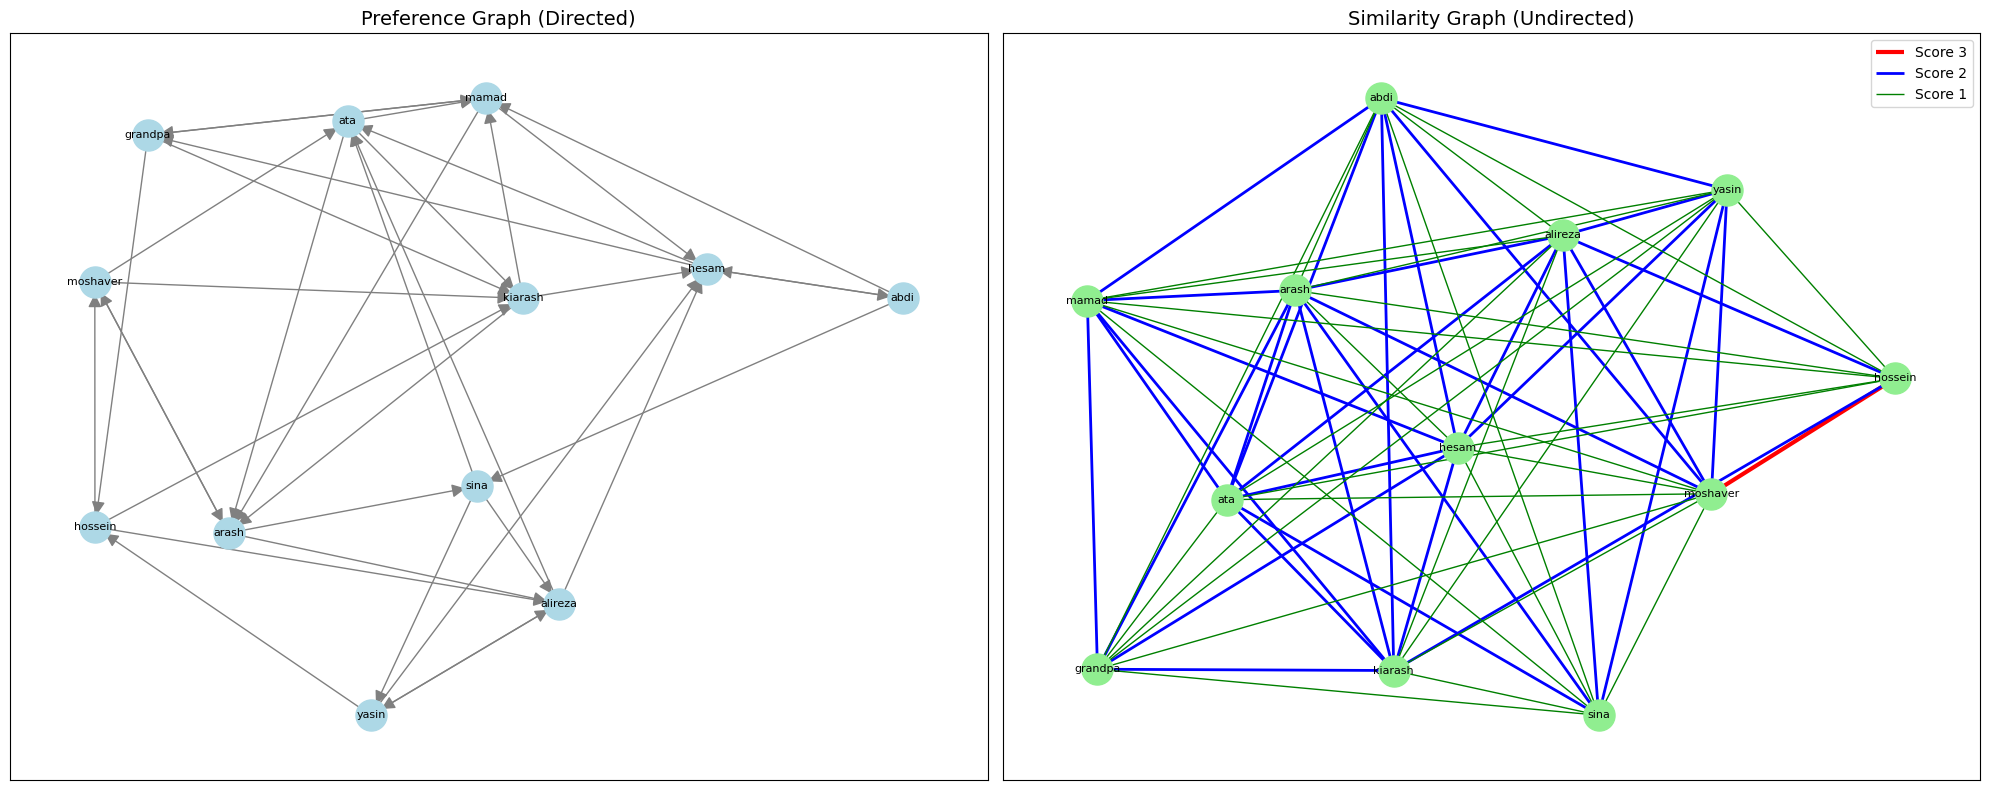

In [81]:
# Step 5: Visualize the graphs
def visualize_graphs(adj_matrix, similarity_matrix, students):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # Create graph for preferences
    G_pref = nx.DiGraph()
    G_pref.add_nodes_from(students)
    
    for i, student1 in enumerate(students):
        for j, student2 in enumerate(students):
            if adj_matrix[i][j] == 1:
                G_pref.add_edge(student1, student2)
    
    # Create graph for similarity
    G_sim = nx.Graph()
    G_sim.add_nodes_from(students)
    
    for i, student1 in enumerate(students):
        for j, student2 in enumerate(students):
            if i < j and similarity_matrix[i][j] > 0:
                G_sim.add_edge(student1, student2, weight=similarity_matrix[i][j])
    
    # Plot preference graph
    pos = nx.spring_layout(G_pref, seed=42)
    nx.draw_networkx_nodes(G_pref, pos, ax=ax1, node_size=500, node_color='lightblue')
    nx.draw_networkx_edges(G_pref, pos, ax=ax1, edge_color='gray', arrows=True, arrowsize=20)
    nx.draw_networkx_labels(G_pref, pos, ax=ax1, font_size=8)
    ax1.set_title('Preference Graph (Directed)', fontsize=14)
    
    # Plot similarity graph
    pos = nx.spring_layout(G_sim, seed=42)
    nx.draw_networkx_nodes(G_sim, pos, ax=ax2, node_size=500, node_color='lightgreen')
    
    # Draw edges with different colors based on weight
    edges_3 = [(u, v) for (u, v, d) in G_sim.edges(data=True) if d['weight'] == 3]
    edges_2 = [(u, v) for (u, v, d) in G_sim.edges(data=True) if d['weight'] == 2]
    edges_1 = [(u, v) for (u, v, d) in G_sim.edges(data=True) if d['weight'] == 1]
    
    nx.draw_networkx_edges(G_sim, pos, ax=ax2, edgelist=edges_3, width=3, edge_color='red', label='Score 3')
    nx.draw_networkx_edges(G_sim, pos, ax=ax2, edgelist=edges_2, width=2, edge_color='blue', label='Score 2')
    nx.draw_networkx_edges(G_sim, pos, ax=ax2, edgelist=edges_1, width=1, edge_color='green', label='Score 1')
    
    nx.draw_networkx_labels(G_sim, pos, ax=ax2, font_size=8)
    ax2.set_title('Similarity Graph (Undirected)', fontsize=14)
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

visualize_graphs(adj_matrix, similarity_matrix, students)


In [83]:
# Step 6: Grouping algorithm
def form_groups(similarity_matrix, students, group_size=3):
    n = len(students)
    available = set(range(n))
    groups = []
    
    student_idx = {student: idx for idx, student in enumerate(students)}
    
    while available:
        if len(available) < group_size:
            # Add remaining students to existing groups
            remaining = list(available)
            for student_idx in remaining:
                best_group = None
                best_score = -1
                
                for i, group in enumerate(groups):
                    current_score = sum(similarity_matrix[student_idx][member] for member in group)
                    if current_score > best_score:
                        best_score = current_score
                        best_group = i
                
                if best_group is not None and len(groups[best_group]) < group_size:
                    groups[best_group].append(student_idx)
                    available.remove(student_idx)
            break
        
        # Find the pair with highest similarity
        best_pair = None
        best_score = -1
        
        for i in available:
            for j in available:
                if i != j and similarity_matrix[i][j] > best_score:
                    best_score = similarity_matrix[i][j]
                    best_pair = (i, j)
        
        if best_pair is None:
            break
            
        group = list(best_pair)
        available.difference_update(group)
        
        # Find third member for the group
        if len(available) > 0:
            best_third = None
            best_third_score = -1
            
            for candidate in available:
                score = sum(similarity_matrix[candidate][member] for member in group)
                if score > best_third_score:
                    best_third_score = score
                    best_third = candidate
            
            if best_third is not None:
                group.append(best_third)
                available.remove(best_third)
        
        groups.append(group)
    
    # Convert indices back to names
    named_groups = []
    for group in groups:
        named_group = [students[idx] for idx in group]
        named_groups.append(named_group)
    
    return named_groups

groups = form_groups(similarity_matrix, students)

print("\nFinal Groups:")
for i, group in enumerate(groups, 1):
    group_score = 0
    for student1, student2 in combinations(group, 2):
        idx1 = student_to_idx[student1]
        idx2 = student_to_idx[student2]
        group_score += similarity_matrix[idx1][idx2]
    
    print(f"Group {i}: {', '.join(group)} (Group similarity score: {group_score})")


Final Groups:
Group 1: moshaver, hossein, alireza (Group similarity score: 7)
Group 2: hesam, ata, abdi (Group similarity score: 6)
Group 3: arash, grandpa, mamad (Group similarity score: 6)
Group 4: yasin, sina, kiarash (Group similarity score: 4)


In [84]:
# Step 7: Calculate total similarity score
def calculate_total_similarity(groups, similarity_matrix, student_to_idx):
    total_similarity = 0
    for group in groups:
        for student1, student2 in combinations(group, 2):
            idx1 = student_to_idx[student1]
            idx2 = student_to_idx[student2]
            total_similarity += similarity_matrix[idx1][idx2]
    return total_similarity

total_similarity = calculate_total_similarity(groups, similarity_matrix, student_to_idx)
print(f"\nTotal similarity score across all groups: {total_similarity}")


Total similarity score across all groups: 23


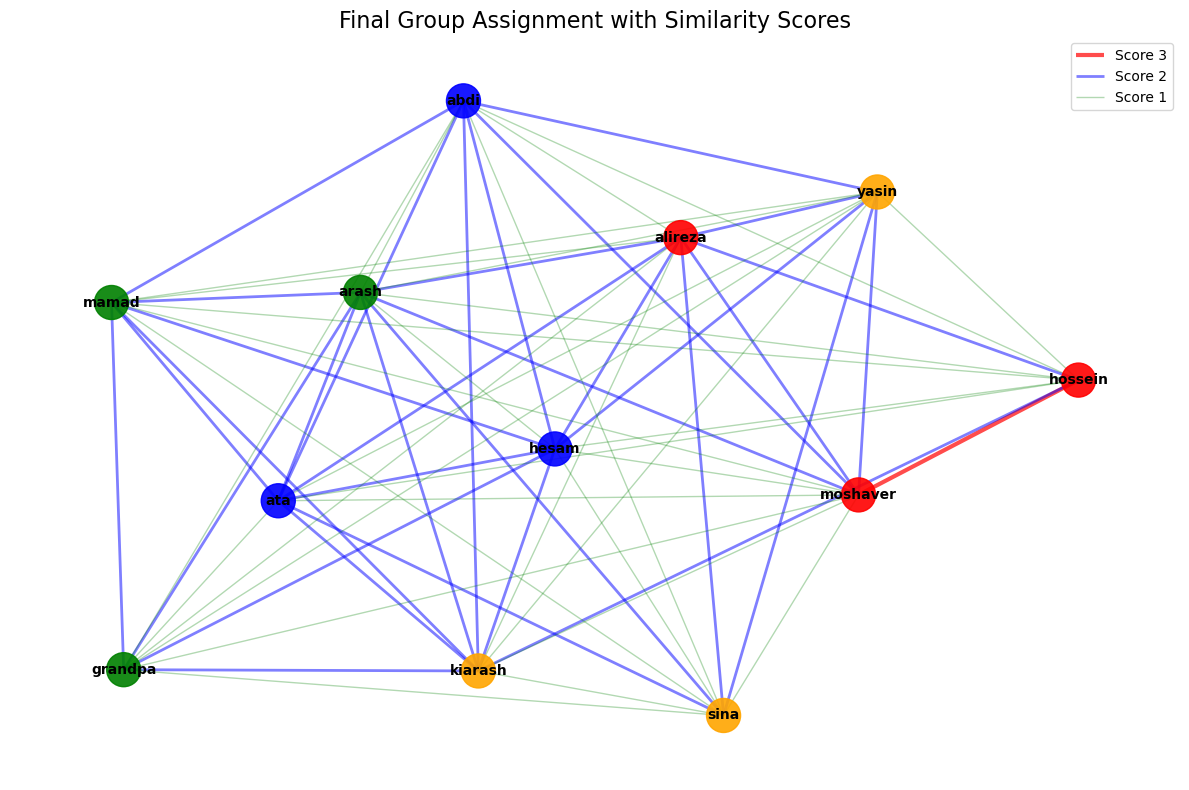

In [85]:
# Step 8: Visualize final groups
def visualize_groups(groups, similarity_matrix, students):
    G = nx.Graph()
    G.add_nodes_from(students)
    
    # Create color mapping for groups
    colors = []
    color_map = []
    group_colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']
    
    for student in students:
        for i, group in enumerate(groups):
            if student in group:
                colors.append(group_colors[i % len(group_colors)])
                break
    
    # Add edges with weights
    for i, student1 in enumerate(students):
        for j, student2 in enumerate(students):
            if i < j and similarity_matrix[i][j] > 0:
                G.add_edge(student1, student2, weight=similarity_matrix[i][j])
    
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, seed=42)
    
    # Draw nodes with group colors
    nx.draw_networkx_nodes(G, pos, node_size=600, node_color=colors, alpha=0.9)
    
    # Draw edges with different styles based on weight
    edges_3 = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] == 3]
    edges_2 = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] == 2]
    edges_1 = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] == 1]
    
    nx.draw_networkx_edges(G, pos, edgelist=edges_3, width=3, edge_color='red', alpha=0.7, label='Score 3')
    nx.draw_networkx_edges(G, pos, edgelist=edges_2, width=2, edge_color='blue', alpha=0.5, label='Score 2')
    nx.draw_networkx_edges(G, pos, edgelist=edges_1, width=1, edge_color='green', alpha=0.3, label='Score 1')
    
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
    
    plt.title('Final Group Assignment with Similarity Scores', fontsize=16)
    plt.legend()
    plt.axis('off')
    plt.tight_layout()
    plt.show()

visualize_groups(groups, similarity_matrix, students)

In [86]:

# Step 9: Display group details
print("\nDetailed Group Analysis:")
for i, group in enumerate(groups, 1):
    print(f"\nGroup {i}: {', '.join(group)}")
    print("Pairwise similarities:")
    for student1, student2 in combinations(group, 2):
        idx1 = student_to_idx[student1]
        idx2 = student_to_idx[student2]
        score = similarity_matrix[idx1][idx2]
        print(f"  {student1} - {student2}: {score}")


Detailed Group Analysis:

Group 1: moshaver, hossein, alireza
Pairwise similarities:
  moshaver - hossein: 3
  moshaver - alireza: 2
  hossein - alireza: 2

Group 2: hesam, ata, abdi
Pairwise similarities:
  hesam - ata: 2
  hesam - abdi: 2
  ata - abdi: 2

Group 3: arash, grandpa, mamad
Pairwise similarities:
  arash - grandpa: 2
  arash - mamad: 2
  grandpa - mamad: 2

Group 4: yasin, sina, kiarash
Pairwise similarities:
  yasin - sina: 2
  yasin - kiarash: 1
  sina - kiarash: 1
